# Constellations

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('../../_static/graph.mplstyle')

In [2]:
# Définition des codes

def qam(N):
    
    c = []
    
    if N == 4:
        c = np.array([[+1, +1], [-1, +1], [-1, -1], [+1, -1]])
    
    if N == 8:
        for x in np.linspace(-3, 3, 4):
            for y in np.linspace(-1, 1, 2):
                c.append([x, y])
                
    if N == 16:
        for x in np.linspace(-3, 3, 4):
            for y in np.linspace(-3, 3, 4):
                c.append([x, y])
                
    if N == 32:
        for x in np.linspace(-5, 5, 6):
            for y in np.linspace(-5, 5, 6):
                if np.abs(x) != 5 or np.abs(y) != 5:
                    c.append([x, y])
        
    return np.array(c)

codes = {
    "4qam"  : qam(4),
    "4ask"  : np.array([ [-3,0], [-1,0], [+1,0], [+3,0] ]),
    "4psk"  : np.array([ [1,0], [0,1], [-1,0], [0,-1] ]),
    "8psk"  : np.array([[np.cos(t),np.sin(t)] for t in np.arange(0,2*np.pi,np.pi/4)])
}

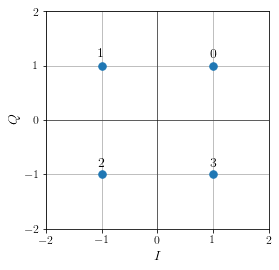

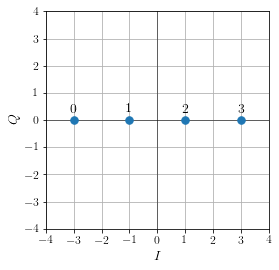

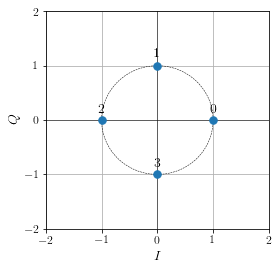

In [3]:
for c in ["4qam", "4ask", "4psk"]:
    
    # Amplitudes
    x = codes[c][:,0]
    y = codes[c][:,1]
    
    # Initialisation du graphe
    xmax = np.max(codes[c]) + 1
    xmin = - xmax
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    ax.set_facecolor('white')
    
    # Axes
    plt.plot([xmin-1, xmax+1], [0, 0], 'k', linewidth=.5)
    plt.plot([0, 0], [xmin-1, xmax+1], 'k', linewidth=.5)
    
    # Cercle (si PSK)
    if "psk" in c:
        p = mpatches.Circle((0, 0), 1, fill=False, edgecolor="black", linestyle="--", linewidth=.5)
        ax.add_artist(p)
    
    # Constellation
    plt.plot(x, y, '.', markersize=15)
    
    # Symboles associés
    d = (xmax-xmin)/30
    for n in range(len(x)):
        plt.text(x[n], y[n]+d, n, ha="center") # Nombre en décimal
    
    # Axes
    plt.xlabel("$I$")
    plt.ylabel("$Q$")
    plt.xticks(np.arange(xmin, xmax+1))
    plt.yticks(np.arange(xmin, xmax+1))
    plt.xlim([xmin, xmax])
    plt.ylim([xmin, xmax])
    
    # Enregistrement et affichage
    plt.savefig(f"code-{c}.svg", transparent=False)
    plt.show()

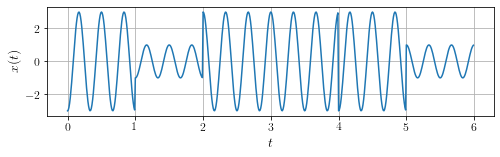

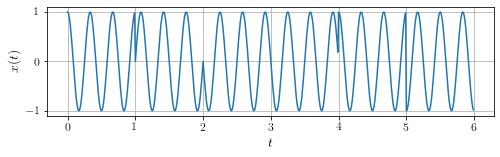

In [7]:
# Signal de la modulation 4-ASK

modulations = ["4ask", "4psk"]

for c in modulations:
    msg = [0, 1, 3, 3, 0, 2]

    # Création du signal
    tk = np.arange(0,1,1e-2)
    t = np.arange(0,len(msg),1e-2)
    fp = 3
    z = []
    a = codes[c][:,0]
    b = codes[c][:,1]
    for k in range(len(msg)):
        ak = a[int(msg[k])]
        bk = b[int(msg[k])]
        zk = ak*np.cos(2*np.pi*fp*tk) + bk*np.sin(2*np.pi*fp*tk)
        z = np.append(z, zk)

    # Affichage
    fig, ax = plt.subplots(1,1, figsize=(8,2))
    plt.plot(t, z)
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")

    # Enregistrement et affichage
    plt.savefig(f"signal-{c}.svg")
    plt.show()

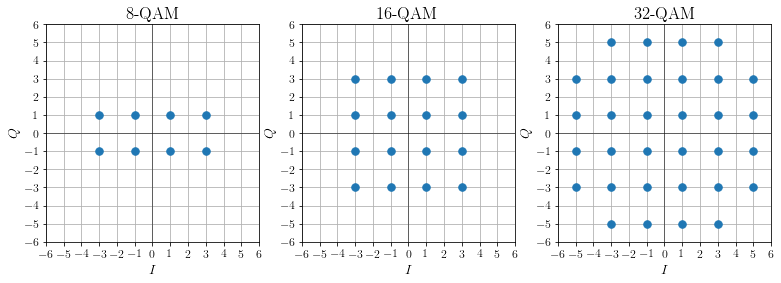

In [5]:
fig, ax = plt.subplots(1,3, figsize=(13,4))
k = 0
    
xmin, xmax = -6, 6

for M in [8, 16, 32]:
    
    # Amplitudes
    code = qam(M)
    x = code[:,0]
    y = code[:,1]
    
    # Axes
    ax[k].plot([xmin-1, xmax+1], [0, 0], 'k', linewidth=.5)
    ax[k].plot([0, 0], [xmin-1, xmax+1], 'k', linewidth=.5)
    
    # Constellation
    ax[k].plot(x, y, '.', markersize=15)
    
    # Axes
    ax[k].set_xlabel("$I$")
    ax[k].set_ylabel("$Q$")
    ax[k].set_title(f"{M}-QAM")
    ax[k].set_xticks(np.arange(xmin, xmax+1))
    ax[k].set_yticks(np.arange(xmin, xmax+1))
    ax[k].set_xlim([xmin, xmax])
    ax[k].set_ylim([xmin, xmax])
    
    k += 1
    
# Enregistrement et affichage
plt.savefig("code-qam.svg")
plt.show()

[ 0.18905338 -0.52274844 -0.41306354 -2.44146738  1.79970738]


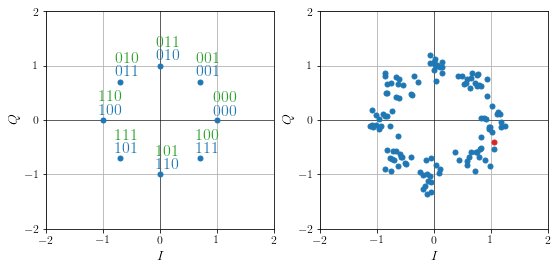

In [14]:
# Seed
rng = np.random.default_rng(2)
print(rng.normal(0, 1, size=(5)))

# Code de Gray
def gray_code(n):
    def gray_code_recurse (g,n):
        k=len(g)
        if n<=0:
            return

        else:
            for i in range (k-1,-1,-1):
                char='1'+g[i]
                g.append(char)
            for i in range (k-1,-1,-1):
                g[i]='0'+g[i]

            gray_code_recurse (g,n-1)

    g=['0','1']
    gray_code_recurse(g,n-1)
    return g

g = gray_code(3)
c = "8psk"

# Amplitudes
x = codes[c][:,0]
y = codes[c][:,1]

# Initialisation du graphe
xmax = np.max(codes[c]) + 1
xmin = - xmax
fig, ax = plt.subplots(1,2, figsize=(9,4))

for k in range(2):
    
     # Axes
    ax[k].plot([xmin-1, xmax+1], [0, 0], 'k', linewidth=.5)
    ax[k].plot([0, 0], [xmin-1, xmax+1], 'k', linewidth=.5)
    
    # Constellation
    if k==1:
        for z in range(15):
            ax[k].plot(
                x+rng.normal(0, .15, size=len(x)),
                y+rng.normal(0, .15, size=len(x)),
                '.', markersize=10, color="tab:blue")
        ax[k].plot(1.05,-.4, '.', markersize=10, color="tab:red", zorder=10)
    else:
        ax[k].plot(x, y, '.', markersize=10)
    
    # Symboles associés
    d = (xmax-xmin)/30
    for n in range(len(x)):
        if k==0:
            ax[k].text(x[n]+d, y[n]+.6*d, f"{n:0>3b}", fontsize=16, ha="center", color="tab:blue") # Nombre en binaire
            ax[k].text(x[n]+d, y[n]+4*d, g[n],         fontsize=16, ha="center", va="top", color="tab:green") # Nombre en Gray
        
    # Axes
    ax[k].set_xlabel("$I$")
    ax[k].set_ylabel("$Q$")
    ax[k].set_xticks(np.arange(xmin, xmax+1))
    ax[k].set_yticks(np.arange(xmin, xmax+1))
    ax[k].set_xlim([xmin, xmax])
    ax[k].set_ylim([xmin, xmax])
    
# Enregistrement et affichage
plt.savefig("constellation-reception.svg")
plt.show()